<a href="https://colab.research.google.com/github/NikRed17/Dataset8/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.info()
print("Пропуски по столбцам:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
Пропуски по столбцам:


In [93]:
print("Было пропусков в Sleep Disorder:", df['Sleep Disorder'].isnull().sum())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('unckown')
print("Стало пропусков:", df['Sleep Disorder'].isnull().sum())

Было пропусков в Sleep Disorder: 219
Стало пропусков: 0


In [94]:
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
df['Blood Pressure'] = df['Blood Pressure'].astype('category')
'Sleep Duration' in df.columns

True

In [95]:
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y
y = df['Heart Rate']
X = df.drop('Heart Rate', axis=1) if 'Heart Rate' in df.columns else df

X.head(n=3) # первые 3 строки перменной X, удостоверимя что Heart Rate не существует

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,4200,unckown
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,10000,unckown
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,10000,unckown


In [96]:
y.head(n=3)

,Heart Rate
0,77
1,75
2,75


In [97]:
X['Occupation']

,Occupation
0,Software Engineer
1,Doctor
2,Doctor
3,Sales Representative
4,Sales Representative
...,...
369,Nurse
370,Nurse
371,Nurse
372,Nurse


In [98]:
from sklearn.preprocessing import OneHotEncoder

X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

gender_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False)
bmi_encoder = OneHotEncoder(sparse_output=False)
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)
# blood_pressure_encoder = OneHotEncoder(sparse_output=False)

gender_encoded = gender_encoder.fit_transform(X[["Gender"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])
sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])
# blood_pressure_encoded = blood_pressure_encoder.fit_transform(X[["Blood Pressure"]])

gender_encoder.categories_
occupation_encoder.categories_
bmi_encoder.categories_
sleep_disorder_encoder.categories_
# blood_pressure_encoder.categories_

[array(['Insomnia', 'Sleep Apnea', 'unckown'], dtype=object)]

In [99]:
gender_encoder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [100]:
occupation_encoder.get_feature_names_out()

array(['Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher'], dtype=object)

In [101]:
bmi_encoder.get_feature_names_out()

array(['BMI Category_Normal', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight'], dtype=object)

In [102]:
sleep_disorder_encoder.get_feature_names_out()

array(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Sleep Disorder_unckown'], dtype=object)

In [103]:
# DataFrame для каждого закодированного признака
gender_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(["Gender"]))
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_encoder.get_feature_names_out(["Occupation"]))
bmi_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI Category"]))
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_encoder.get_feature_names_out(["Sleep Disorder"]))

# Удаляем исходные категориальные столбцы из X и сохраняем в X_categorical
X_categorical = X.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)

# Определяем числовые признаки для масштабирования
numeric_features = ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                   'Stress Level', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

from sklearn.preprocessing import StandardScaler
# Масштабируем только числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_categorical[numeric_features])
X_numeric_df = pd.DataFrame(X_scaled, columns=[f"{col}_scaled" for col in numeric_features])

# Соединяем масштабированные числовые признаки с закодированными категориальными
X = pd.concat([X_numeric_df, gender_df, occupation_df, bmi_df, sleep_disorder_df], axis=1)

X.head()

,Person ID_scaled,Age_scaled,Sleep Duration_scaled,Quality of Sleep_scaled,Physical Activity Level_scaled,Stress Level_scaled,Daily Steps_scaled,Systolic_BP_scaled,Diastolic_BP_scaled,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unckown
0,-1.727426,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [104]:
from sklearn.linear_model import LinearRegression

# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

model1 = LinearRegression() # модель задачи 1
model1.fit(X, y)
y_pred = model1.predict(X)
y_pred

array([73.49528391, 70.82709514, 70.82321281, 85.00194116, 84.99805884,
       89.17191613, 84.75252891, 70.51119787, 70.50731555, 70.50343322,
       70.21190425, 70.49566856, 70.20413959, 70.11492869, 70.11104636,
       70.10716403, 77.65157628, 71.22755489, 76.32821981, 70.30433417,
       70.38578042, 70.38189809, 70.37801576, 70.37413343, 70.45557967,
       70.53702592, 70.44781502, 70.52926126, 70.52537893, 70.5214966 ,
       77.26819183, 75.94871769, 72.26967903, 72.33239673, 70.3418092 ,
       72.32463207, 72.32074974, 70.24483365, 70.24095132, 70.23706899,
       70.31851523, 70.3146329 , 70.31075058, 70.39219682, 70.30298592,
       70.38443216, 70.29522126, 70.3766675 , 70.28745661, 71.41172979,
       64.43031114, 64.42642881, 72.1836853 , 70.19309777, 72.17592064,
       72.17203831, 70.26677936, 72.16427366, 72.16039133, 70.25513237,
       72.15262667, 72.14874435, 72.31551916, 72.31163683, 72.3077545 ,
       72.30387217, 71.3352238 , 71.94839545, 76.29655012, 76.29

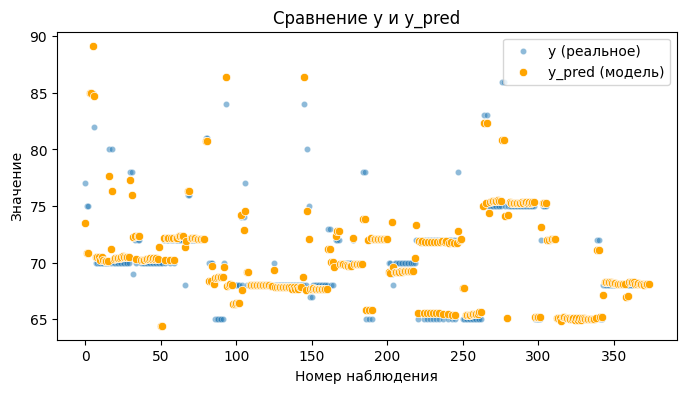

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

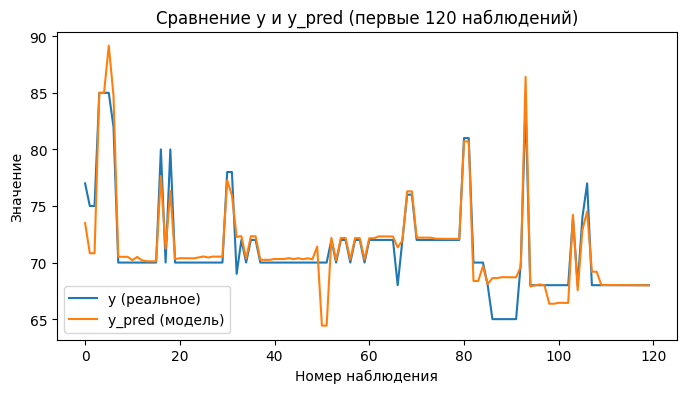

In [106]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()

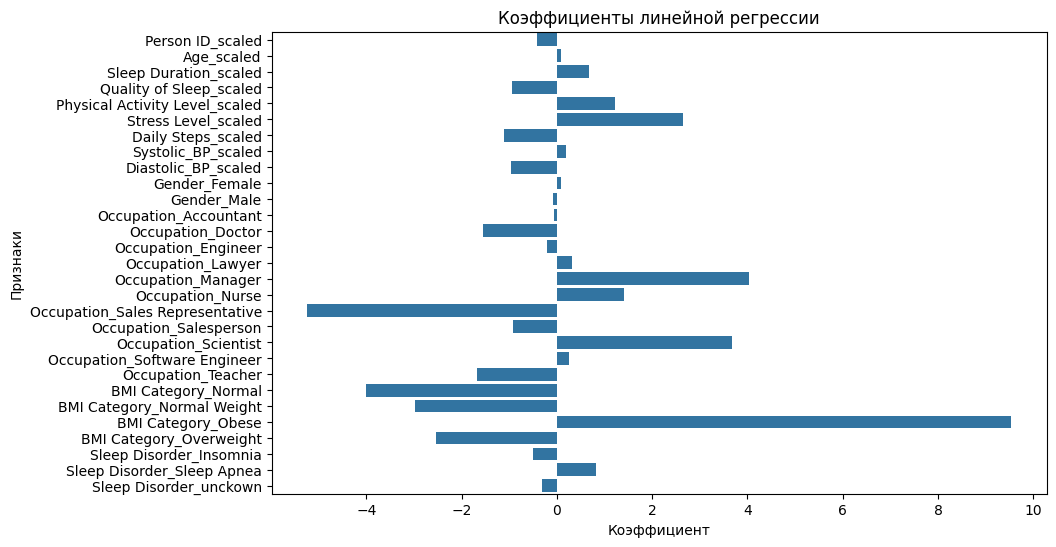

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(x=model1.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

По графикам сравнения видно, что точки предсказания следуют за реальными точками, близкок идеальной линии, с небольшими отклоненииями.

По графику коэффицентов можно сказать, что большое влияние есть у страдающих ожирением.

У торговых представителей влияние отрицательное

С увеличением активности и стресса, увеличивается частота сердцебиения.

In [108]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

y_pred = model1.predict(X)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.631
MAPE=0.009, MAPE_as_percent=0.880%
R2=0.913
MSE=1.487
RMSE=1.220


MAE (Mean Absolute Error)

Ошибается в 0.631 единиц. Значение близко к нулю, так что нормально.

MAPE (Mean Absolute Percentage Error)

Средняя ошибка: 2.411% всё отлично (<10%).

MSE (Mean Squared Error)

Средний квадрат ошибки 1.487, что не очень хорошо, надо близко к нулю.

RMSE (Root Mean Squared Error)

У нас 1.220, не очень, не близко к нулю

Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.

R² (Коэффициент детерминации)

Значение 0.913 близко к 1, так что модель предсказывает почти идеально.

In [109]:
from sklearn.model_selection import train_test_split

# Используем уже обработанные данные из Модели 1
X_2 = X
y_2 = y
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X.head()

,Person ID_scaled,Age_scaled,Sleep Duration_scaled,Quality of Sleep_scaled,Physical Activity Level_scaled,Stress Level_scaled,Daily Steps_scaled,Systolic_BP_scaled,Diastolic_BP_scaled,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unckown
0,-1.727426,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [110]:

model2 = LinearRegression() # модель задачи 2
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [111]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 0.689
MAPE=0.010, MAPE_as_percent=0.969%
R2=0.908
MSE=1.504
RMSE=1.226


In [112]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 0.699
MAPE=0.009, MAPE_as_percent=0.941%
R2=0.881
MSE=2.363
RMSE=1.537


Значения метрик хорошие, разница между ними небольшая. R2 близко к 1, пойдет.

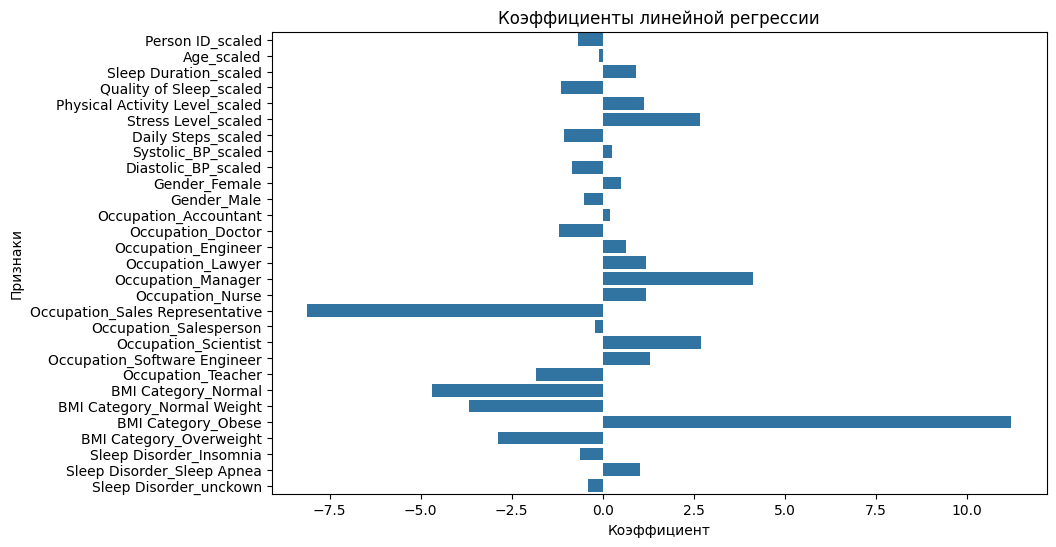

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(x=model2.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [114]:
categorical_features = ['Sleep Disorder', 'Occupation', 'BMI Category', 'Blood Pressure']
numeric_features = ['Quality of Sleep','Stress Level']
best_features = categorical_features + numeric_features

X = df[best_features]
y = df['Heart Rate']

X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

# Теперь только 3 числовых признака
numeric_features = ['Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Quality of Sleep']

# Простое кодирование как в первой модели
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False)
bmi_encoder = OneHotEncoder(sparse_output=False)

sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])

# Создаем DataFrame
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_encoder.get_feature_names_out(["Sleep Disorder"]))
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_encoder.get_feature_names_out(["Occupation"]))
bmi_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI Category"]))

# Удаляем категориальные столбцы
X_without_categorical = X.drop(['Sleep Disorder', 'Occupation', 'BMI Category'], axis=1)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_without_categorical)
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

# Соединяем всё
X = pd.concat([X_numeric_df, sleep_disorder_df, occupation_df, bmi_df], axis=1)

X.head()

,Stress Level,Systolic_BP,Diastolic_BP,Quality of Sleep,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unckown,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,-1.098280,0.347021,-0.330002,-0.268102,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.098280,1.475592,-0.459239,-0.755640,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.098280,1.475592,-0.459239,-0.755640,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-2.771424,1.475592,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-2.771424,1.475592,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
model3 = LinearRegression() # модель задачи 3
model3.fit(X, y)
y_pred = model3.predict(X)
y_pred

array([72.14285562, 72.19970123, 72.19970123, 85.        , 85.        ,
       89.313156  , 84.49604439, 69.71715801, 69.71715801, 69.71715801,
       72.67358418, 69.71715801, 72.67358418, 72.67358418, 72.67358418,
       72.67358418, 76.32425015, 73.92198027, 74.85813309, 69.71715801,
       69.71715801, 69.71715801, 69.71715801, 69.71715801, 69.71715801,
       69.71715801, 69.71715801, 69.71715801, 69.71715801, 69.71715801,
       76.51435856, 75.0482415 , 70.96269907, 72.19970123, 69.71715801,
       72.19970123, 72.19970123, 69.71715801, 69.71715801, 69.71715801,
       69.71715801, 69.71715801, 69.71715801, 69.71715801, 69.71715801,
       69.71715801, 69.71715801, 69.71715801, 69.71715801, 70.9655541 ,
       66.91977716, 66.91977716, 72.19970123, 69.71715801, 72.19970123,
       72.19970123, 69.71715801, 72.19970123, 72.19970123, 69.71715801,
       72.19970123, 72.19970123, 72.19970123, 72.19970123, 72.19970123,
       72.19970123, 71.35494771, 71.98198026, 76.17127398, 76.17

In [116]:
y_best_pred = model3.predict(X)
MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.897
MAPE=0.013, MAPE_as_percent=1.261%
R2=0.880
MSE=2.042
RMSE=1.429


In [117]:
y_best_pred = model3.predict(X)
MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.897
MAPE=0.013, MAPE_as_percent=1.261%
R2=0.880
MSE=2.042
RMSE=1.429


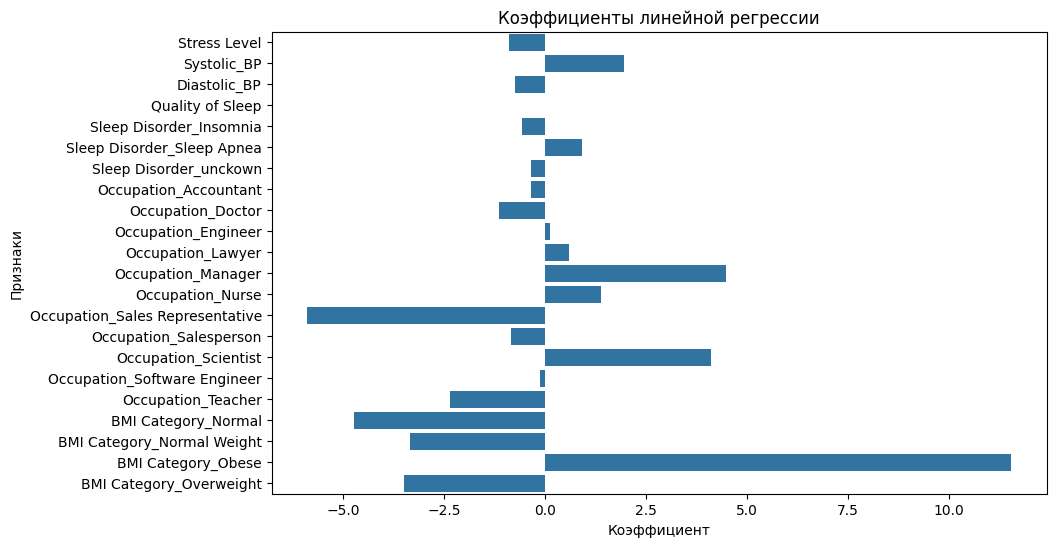

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест
len(X_train), len(X_test), len(y_train), len(y_test)

(299, 75, 299, 75)

In [120]:
model4 = LinearRegression()
model4.fit(X_train, y_train)
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

In [121]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 0.689
MAPE=0.010, MAPE_as_percent=0.969%
R2=0.908
MSE=1.504
RMSE=1.226


In [122]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 0.699
MAPE=0.009, MAPE_as_percent=0.941%
R2=0.881
MSE=2.363
RMSE=1.537


Значения метрик хорошие, разница между ними небольшая. R2 близко к 1, в целом неплохо.

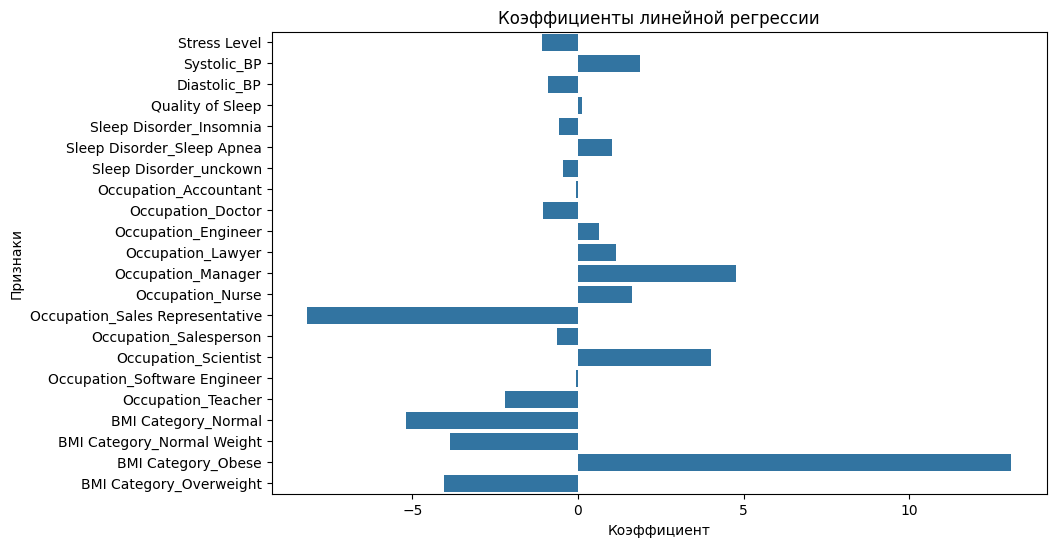

In [123]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

Вывод по всем 4 моделям:

R2 0.871-0.913

MAPE 0.880-1.185, то есть примерно 1%

Разница R2 между train и test не больше 0.027

Значит модель стабильна и не переобучена
